In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#we are loading the data from 01/01/2015 to 26/09/2021
btc_hist = pd.read_csv('./BTC-USD.csv')

In [3]:
#There are some missing values

btc_hist[btc_hist.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
1933,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2108,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2111,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2112,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#We add the missing data manually (these values come from coinmarketcap.com)
#then we create a copy of the data so as not to change the original

btc_hist_m=btc_hist.copy()

btc_hist_m.loc[[2112]]=['2020-10-13', 11548.72, 11548.98, 11321.22,
        11425.90, 11425.90, 24241420251.0]
btc_hist_m.loc[[2111]]=['2020-10-12', 11392.64, 11698.47, 11240.69,
        11555.36, 11555.36, 26163972642.0]
btc_hist_m.loc[[2108]]=['2020-10-09', 10927.91, 11102.67, 10846.85,
        11064.46, 11064.46, 22799117613.0]
btc_hist_m.loc[[1933]]=['2020-04-17', 7116.55, 7167.18, 7050.33,
        7096.18, 7096.18, 32513423567.0]

btc_hist_m[btc_hist_m.isna().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume


In [5]:
#We change the column Date to a date format
btc_hist_m['Date']=pd.to_datetime(arg=btc_hist_m['Date'],format='%Y-%m-%d')

In [6]:
#Erasing unnecesary columns
btc_hist_m = btc_hist_m.drop(labels=['Open','High','Low','Adj Close'], axis=1)

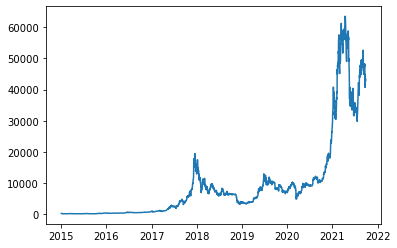

In [11]:
#Let's take a look at the data
plt.plot(btc_hist_m['Date'], btc_hist_m['Close'])

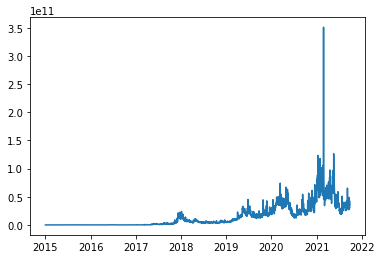

In [12]:
#Let's take a look at the data
plt.plot(btc_hist_m['Date'], btc_hist_m['Volume'])

In [13]:
btc_hist_m['dia']=btc_hist_m['Date'].dt.day_name()
btc_hist_m['mes']=btc_hist_m['Date'].dt.month

In [14]:
#Adding columns with variations from previous day, week and month
btc_hist_m['C_dia_ant'] = btc_hist_m['Close'].shift(1)
btc_hist_m['C_dia_ant'].loc[[0]]=btc_hist_m['C_dia_ant'][1]

btc_hist_m['var_dia_ant']=btc_hist_m['Close']/btc_hist_m['C_dia_ant']-1

/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
btc_hist_m['C_sem_ant'] = btc_hist_m['Close'].shift(7)

for i in range(0,7):
    btc_hist_m['C_sem_ant'].loc[[i]]=btc_hist_m['C_sem_ant'][i+7]

btc_hist_m['var_sem_ant']=btc_hist_m['Close']/btc_hist_m['C_sem_ant']-1

In [16]:
btc_hist_m['C_mes_ant'] = btc_hist_m['Close'].shift(30)

for i in range(0,30):
    btc_hist_m['C_mes_ant'].loc[[i]]=btc_hist_m['C_mes_ant'][i+30]

btc_hist_m['var_mes_ant']=btc_hist_m['Close']/btc_hist_m['C_mes_ant']-1

In [17]:
#There seem to be important differences between weekdays (on mondays prices go up much more than on sundays)
btc_hist_m.groupby('dia')['var_dia_ant'].mean()

dia
Friday       0.004046
Monday       0.006154
Saturday     0.003444
Sunday       0.000011
Thursday     0.002681
Tuesday      0.000859
Wednesday    0.002302
Name: var_dia_ant, dtype: float64

In [18]:
#Let's see if there's a significant difference in the number of times prices go up for each weekday
#The "best" days change with respect to the ones with the biggest variations, but there are important differences
#In this case, the probability of price going up on a Saturday is 6,5% higher than on a Tuesday
btc_hist_m.groupby('dia')['var_dia_ant'].apply(lambda x: (x>0).sum()/(x).count())*100

dia
Friday       58.238636
Monday       54.985755
Saturday     57.954545
Sunday       51.704545
Thursday     53.977273
Tuesday      51.566952
Wednesday    54.415954
Name: var_dia_ant, dtype: float64

In [19]:
#There seem to be important differences between months,
#but we can't say thats representative because we have very few months of each (6 years)
btc_hist_m[btc_hist_m['Date']<'2021-01-01'].groupby('mes')['var_mes_ant'].mean()

mes
1     0.015642
2     0.005357
3     0.004432
4     0.055069
5     0.231284
6     0.153740
7     0.070115
8     0.079969
9    -0.017804
10    0.083951
11    0.190223
12    0.210622
Name: var_mes_ant, dtype: float64

In [20]:
#Adding column for variation in volume from previous day
btc_hist_m['V_dia_ant'] = btc_hist_m['Volume'].shift(1)
btc_hist_m['V_dia_ant'].loc[[0]]=btc_hist_m['V_dia_ant'][1]

btc_hist_m['var_V_dia_ant']=btc_hist_m['Volume']/btc_hist_m['V_dia_ant']-1

/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


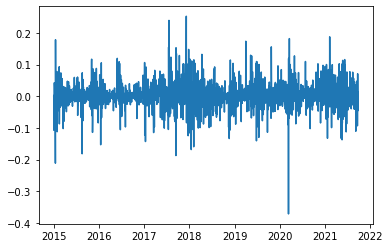

In [22]:
#Let's take a look at the variation data
#I think everything outside the variation range [-0.15,0.15] is an outlier
plt.plot(btc_hist_m['Date'], btc_hist_m['var_dia_ant'])

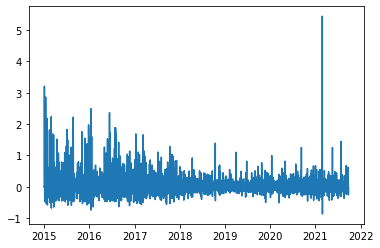

In [23]:
#Let's take a look at the variation data
#I'm pretty sure everythin over 200% variation is an outlier
plt.plot(btc_hist_m['Date'], btc_hist_m['var_V_dia_ant'])

In [29]:
#ahora creamos el set de datos de verdad, que por ahora va a contener:
#We create the real dataset for classification algorithms. It will contain:
#day-to-day price variation of the last 30 days
#day-to-day volume variation of the last 30 days
#week-to-week price variation from 4 weeks before to 12 weeks before
#month-to-month price variation from 3 months before to 11 months before
#the day of the week
#if the price variation of the following day is considered an outlier (1) or not (0)
#if the price went up (1) o not (0) the next day. This is what we are trying to predict
#all this data starting 2016/1/1

columnasData=['varP0', 'varP1', 'varP2', 'varP3', 'varP4', 'varP5', 'varP6', 'varP7', 'varP8', 'varP9',
             'varP10', 'varP11', 'varP12', 'varP13', 'varP14', 'varP15', 'varP16', 'varP17', 'varP18', 'varP19',
             'varP20', 'varP21', 'varP22', 'varP23', 'varP24', 'varP25', 'varP26', 'varP27', 'varP28', 'varP29',
             'varPs30', 'varPs37', 'varPs44', 'varPs51', 'varPs58', 'varPs65', 'varPs72', 'varPs79', 'varPs86',
             'varPm93', 'varPm123', 'varPm153', 'varPm183', 'varPm213', 'varPm243', 'varPm273', 'varPm303',
             'varPm333',
             'varV0', 'varV1', 'varV2', 'varV3', 'varV4', 'varV5', 'varV6', 'varV7', 'varV8', 'varV9',
             'varV10', 'varV11', 'varV12', 'varV13', 'varV14', 'varV15', 'varV16', 'varV17', 'varV18', 'varV19',
             'varV20', 'varV21', 'varV22', 'varV23', 'varV24', 'varV25', 'varV26', 'varV27', 'varV28', 'varV29',
             'dia', 'outlier', 'subida']
data_for_use = pd.DataFrame(columns=columnasData)


for i in range(0,btc_hist_m.shape[0]-1):
    if btc_hist_m['Date'][i]>pd.to_datetime(arg='2015-12-31',format='%Y-%m-%d'):
        dtemp = pd.concat([pd.DataFrame(btc_hist_m['var_dia_ant'][i-29:i+1][::-1].values),
                            pd.DataFrame(btc_hist_m['var_sem_ant'][i-92:i-29][::-7].values),
                            pd.DataFrame(btc_hist_m['var_mes_ant'][i-362:i-92][::-30].values),
                            pd.DataFrame(btc_hist_m['var_V_dia_ant'][i-29:i+1][::-1].values),
                            pd.DataFrame([btc_hist_m['dia'][i]]),
                            pd.DataFrame([abs(btc_hist_m['var_dia_ant'][i+1])>0.15]),
                            pd.DataFrame([btc_hist_m['var_dia_ant'][i+1]>0])],
                          ignore_index=True, axis=0).T

        dtemp = dtemp.set_index(keys=[btc_hist_m['Date'].loc[[i]]])
        
        new_cols = {x: y for x, y in zip(dtemp.columns, data_for_use.columns)}

        dtemp = dtemp.rename(columns=new_cols)

        data_for_use = data_for_use.append(dtemp.rename(columns=new_cols))


In [30]:
data_for_use.head(20)

,varP0,varP1,varP2,varP3,varP4,varP5,varP6,varP7,varP8,varP9,...,varV23,varV24,varV25,varV26,varV27,varV28,varV29,dia,outlier,subida
2016-01-01,0.008749,0.00925177,-0.0146957,0.0253482,-0.0012866,0.0132982,-0.0842286,0.00146825,0.0284447,0.0133518,...,0.572924,-0.0891077,-0.183974,0.173196,0.852281,-0.294407,-0.0636183,Friday,False,False
2016-01-02,-0.00206299,0.008749,0.00925177,-0.0146957,0.0253482,-0.0012866,0.0132982,-0.0842286,0.00146825,0.0284447,...,-0.426523,0.572924,-0.0891077,-0.183974,0.173196,0.852281,-0.294407,Saturday,False,False
2016-01-03,-0.00790656,-0.00206299,0.008749,0.00925177,-0.0146957,0.0253482,-0.0012866,0.0132982,-0.0842286,0.00146825,...,1.12785,-0.426523,0.572924,-0.0891077,-0.183974,0.173196,0.852281,Sunday,False,True
2016-01-04,0.00716265,-0.00790656,-0.00206299,0.008749,0.00925177,-0.0146957,0.0253482,-0.0012866,0.0132982,-0.0842286,...,0.18951,1.12785,-0.426523,0.572924,-0.0891077,-0.183974,0.173196,Monday,False,False
2016-01-05,-0.00261149,0.00716265,-0.00790656,-0.00206299,0.008749,0.00925177,-0.0146957,0.0253482,-0.0012866,0.0132982,...,-0.582852,0.18951,1.12785,-0.426523,0.572924,-0.0891077,-0.183974,Tuesday,False,False
2016-01-06,-0.00660936,-0.00261149,0.00716265,-0.00790656,-0.00206299,0.008749,0.00925177,-0.0146957,0.0253482,-0.0012866,...,1.37047,-0.582852,0.18951,1.12785,-0.426523,0.572924,-0.0891077,Wednesday,False,True
2016-01-07,0.0674497,-0.00660936,-0.00261149,0.00716265,-0.00790656,-0.00206299,0.008749,0.00925177,-0.0146957,0.0253482,...,-0.363037,1.37047,-0.582852,0.18951,1.12785,-0.426523,0.572924,Thursday,False,False
2016-01-08,-0.0105185,0.0674497,-0.00660936,-0.00261149,0.00716265,-0.00790656,-0.00206299,0.008749,0.00925177,-0.0146957,...,0.298635,-0.363037,1.37047,-0.582852,0.18951,1.12785,-0.426523,Friday,False,False
2016-01-09,-0.0123977,-0.0105185,0.0674497,-0.00660936,-0.00261149,0.00716265,-0.00790656,-0.00206299,0.008749,0.00925177,...,-0.555525,0.298635,-0.363037,1.37047,-0.582852,0.18951,1.12785,Saturday,False,True
2016-01-10,0.000848963,-0.0123977,-0.0105185,0.0674497,-0.00660936,-0.00261149,0.00716265,-0.00790656,-0.00206299,0.008749,...,0.25515,-0.555525,0.298635,-0.363037,1.37047,-0.582852,0.18951,Sunday,False,True


In [31]:
data_for_use.to_csv('bitcoin_data_for_use_v3.csv')